Note: many sources were used for putting this Notebook together, often code and comments are included as-is from the original source. Sources are provided ahead of the content that was taken from them. Thank you to the creators of the many wonderful Geopandas resources already in existance!

# First we need to import our libraries

In [65]:
%matplotlib inline

import os

import matplotlib as mpl
import matplotlib.pyplot as plt
# The two statemens below are used mainly to set up a plotting
# default style that's better than the default from matplotlib
import seaborn as sns
plt.style.use('bmh')

from shapely.geometry import Point, LineString
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
import pyepsg

from shapely.wkt import loads

data_pth = "../Data/"

# Let's start by making some simple graphs
Source: https://github.com/geohackweek/tutorial_contents

In [66]:
# Let's check the version of the libraries we're using. Do yours look the same as mine?
mpl.__version__, pd.__version__, gpd.__version__

('2.1.1', '0.22.0', '0.3.0')

Let's look at the some of the data types we have to work with

In [67]:
from shapely.wkt import loads

GeoSeries([loads('POINT(1 2)'), loads('POINT(1.5 2.5)'), loads('POINT(2 3)')])

0        POINT (1 2)
1    POINT (1.5 2.5)
2        POINT (2 3)
dtype: object

In [68]:
gs = GeoSeries([Point(-120, 45), Point(-121.2, 46), Point(-122.9, 47.5)])
gs

0        POINT (-120 45)
1      POINT (-121.2 46)
2    POINT (-122.9 47.5)
dtype: object

In [69]:
type(gs), len(gs)

(geopandas.geoseries.GeoSeries, 3)

In [70]:
#Set the projection
gs.crs = {'init': 'epsg:4326'}

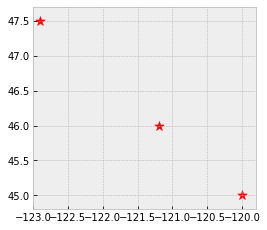

In [71]:
gs.plot(marker='*', color='red', markersize=100, figsize=(4, 4))
plt.xlim([-123, -119.8])
plt.ylim([44.8, 47.7]);

In [72]:
data = {'name': ['a', 'b', 'c'],
        'lat': [45, 46, 47.5],
        'lon': [-120, -121.2, -122.9]}

In [73]:
geometry = [Point(xy) for xy in zip(data['lon'], data['lat'])]
geometry

In [74]:
gs = GeoSeries(geometry, index=data['name'])
gs

a        POINT (-120 45)
b      POINT (-121.2 46)
c    POINT (-122.9 47.5)
dtype: object

# Using Geopandas Datasets
Source: http://geopandas.org/mapping.html

Geopandas comes with some datasets that we can use!

In [75]:
# Loading some example data:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [76]:
# Let's examine the top few rows
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


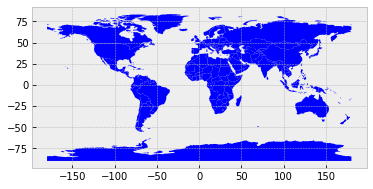

In [77]:
# Now let's plot it!
world.plot();

In [78]:
# cities is another geopandas dataset. It includes points for the capitals of each country.
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [79]:
# Again we'll look at the top few rows
cities.head()

,name,geometry
0,Vatican City,POINT (12.45338654497177 41.90328217996012)
1,San Marino,POINT (12.44177015780014 43.936095834768)
2,Vaduz,POINT (9.516669472907267 47.13372377429357)
3,Luxembourg,POINT (6.130002806227083 49.61166037912108)
4,Palikir,POINT (158.1499743237623 6.916643696007725)


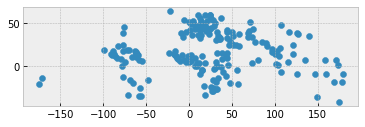

In [80]:
# Plot the cities using the default style
cities.plot()

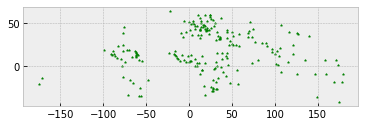

In [81]:
# Plot the cities using custom style
cities.plot(marker='*', color='green', markersize=5);

YOUR TURN #1: Play around with making the city dots different colors and sizes

In [82]:
# Your code here




In [83]:
# We can exclude Antarctica or area by name
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

In [84]:
# The data came with a gdp_per_cap column, so we can use this data to make a choropleth map!
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

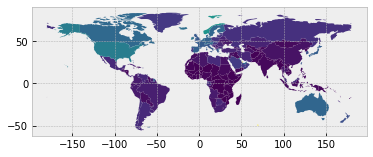

In [85]:
# And plot...
world.plot(column='gdp_per_cap');

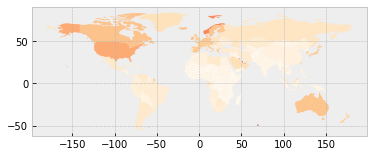

In [86]:
# We can change the style using the cmap property
world.plot(column='gdp_per_cap', cmap='OrRd');

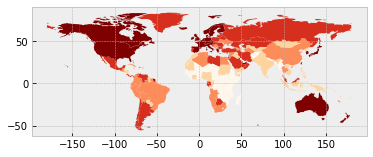

In [87]:
# You can change the default classification scheme
base = world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles');

YOUR TURN #2: The scheme option can be set to 'equal_interval', 'quantiles', or 'fisher_jenks'. 
Try out each one. See the difference?

More info on classification schemes: http://pysal.readthedocs.io/en/latest/library/esda/mapclassify.html

In [88]:
# Your code here




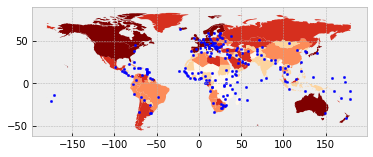

In [89]:
# We can plot the cities on top of our new chropleth map
base = world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles');
cities.plot(ax=base, marker='o', color='blue', markersize=5);

Geopandas is geo-enabled [Pandas](https://pandas.pydata.org/), a Python data science library, so we have everything that comes with Pandas already!

In [1]:
# Add stuff about pandas, make some charts based on GDP


# Managing Projections

Source: http://geopandas.org/projections.html

We saw before how we can set a projection. We can also check a projection and re-project.

In [90]:
# Check original projection
# (it's Platte Carre! x-y are long and lat)
world.crs

{'init': 'epsg:4326'}

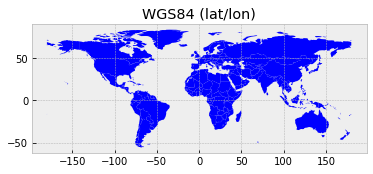

In [91]:
ax = world.plot()
ax.set_title("WGS84 (lat/lon)");

In [92]:
#Set the projection to be the same as another dataset
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]
world = world.to_crs(epsg=3395)

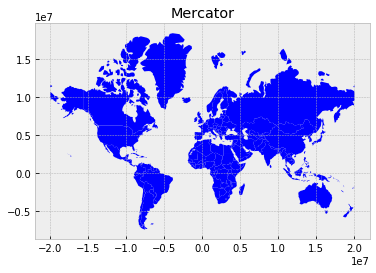

In [93]:
ax = world.plot()
ax.set_title("Mercator");

YOUR TURN #3: Now reproject `cities` to the Mercator projection. Can you plot both the world and cities in the same map in the Mercator projection?

In [94]:
# Your code here
